# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data (/a document)?

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

Data comes from https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [5]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

## Exploration

Represent text as word frequencies.

In [13]:
pd.Series(all_words.split()).value_counts()

i              2350
to             2240
you            2124
a              1431
the            1322
               ... 
senor             1
outl8r            1
supportvery       1
0796xxxxxx        1
avenue            1
Length: 9557, dtype: int64

In [7]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [14]:
spam_freq

to                   686
a                    376
call                 347
you                  287
your                 263
                    ... 
087123002209am7pm      1
lounge                 1
3mobile                1
deepest                1
speciale               1
Length: 3033, dtype: int64

In [8]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?

In [15]:
#most frequently occuring
word_counts.sort_values(by='all', ascending=False)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
...,...,...,...
imaginationmy,1,0,1
meso,1,0,1
resolution,1,0,1
hsbc,1,0,1


In [16]:
#all spam
word_counts[word_counts.ham==0]

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
...,...,...,...
stolen,0,1,1
087123002209am7pm,0,1,1
3mobile,0,1,1
deepest,0,1,1


In [17]:
word_counts[word_counts.spam==0]

,ham,spam,all
ltgt,276,0,276
he,184,0,184
lor,160,0,160
later,134,0,134
da,131,0,131
...,...,...,...
syd,1,0,1
iaove,1,0,1
numberso,1,0,1
clash,1,0,1


In [19]:
word_counts.sort_values(['spam','ham'], ascending=[True, False]).head(30)

,ham,spam,all
ltgt,276,0,276
he,184,0,184
lor,160,0,160
later,134,0,134
da,131,0,131
she,130,0,130
thats,94,0,94
say,91,0,91
ask,88,0,88
said,86,0,86


### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

Text(0.5, 1.0, 'Ham vs Spam for Top 20 Most Frequent Words')

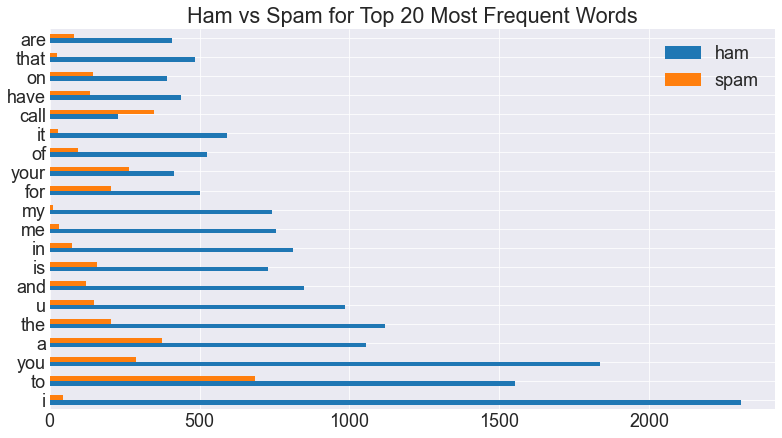

In [29]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['ham','spam']].plot.barh()
plt.title('Ham vs Spam for Top 20 Most Frequent Words')

In [27]:
word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


In [26]:
word_counts.sort_values('all', ascending=False).head(20).apply(lambda row: row/row['all'],axis=1)

,ham,spam,all
i,0.980851,0.019149,1.0
to,0.693750,0.306250,1.0
you,0.864878,0.135122,1.0
a,0.737247,0.262753,1.0
the,0.845688,0.154312,1.0
u,0.870256,0.129744,1.0
and,0.874227,0.125773,1.0
is,0.821670,0.178330,1.0
in,0.917421,0.082579,1.0
me,0.961832,0.038168,1.0


Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

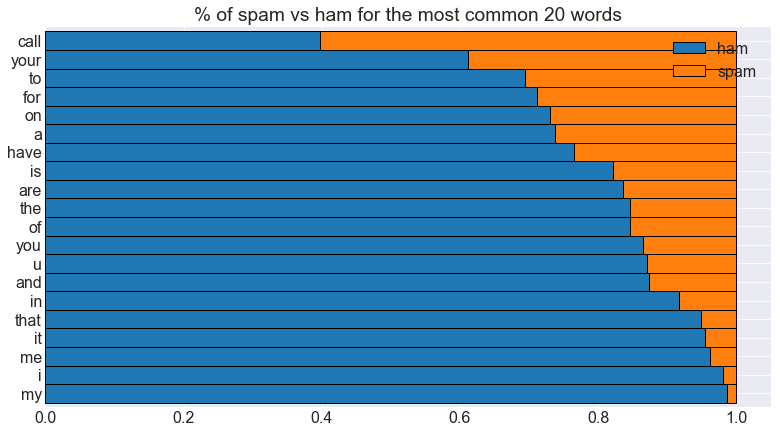

In [35]:
plt.figure(figsize=(16,9))
plt.rc('font', size=16)
(word_counts.sort_values('all', ascending=False).head(20)
 .apply(lambda row: row/row['all'],axis=1).drop(columns='all').sort_values(by='spam').plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

- what are the most common bigrams? spam bigrams? ham bigrams?
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

In [36]:
sentence = 'Today is Tuesday, and the weather is nice'

In [37]:
sentence.split()

['Today', 'is', 'Tuesday,', 'and', 'the', 'weather', 'is', 'nice']

In [40]:
#make sure you split or it's gonna be a mess!
list(nltk.bigrams(sentence.split()))

[('Today', 'is'),
 ('is', 'Tuesday,'),
 ('Tuesday,', 'and'),
 ('and', 'the'),
 ('the', 'weather'),
 ('weather', 'is'),
 ('is', 'nice')]

In [41]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts()

(you, have)                  73
(have, won)                  54
(your, mobile)               49
(to, claim)                  46
(please, call)               44
                             ..
(age16, 2stop)                1
(the, 80s)                    1
(mobile, free)                1
(missed, your)                1
(wwwclubzedcouk, billing)     1
Length: 8719, dtype: int64

<AxesSubplot:>

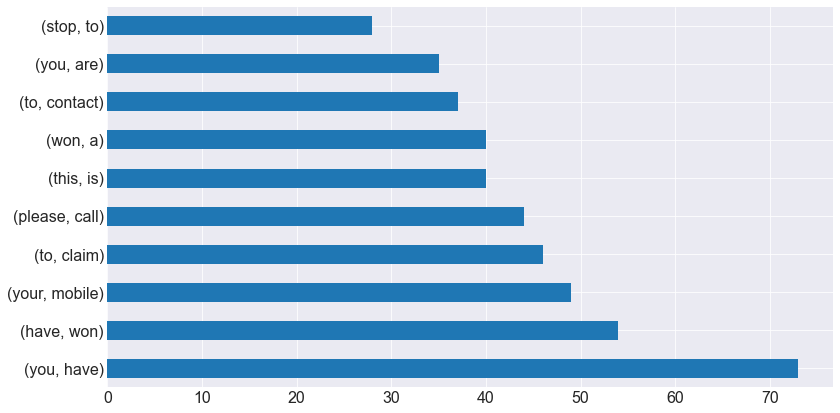

In [42]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()

## Word Cloud

(-0.5, 799.5, 599.5, -0.5)

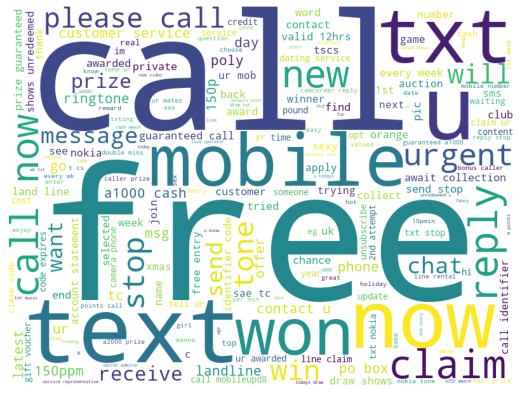

In [44]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [54]:
df['message_length'] = df.text.apply(len)
df.groupby('label').message_length.mean()

label
ham      71.023627
spam    138.866131
Name: message_length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

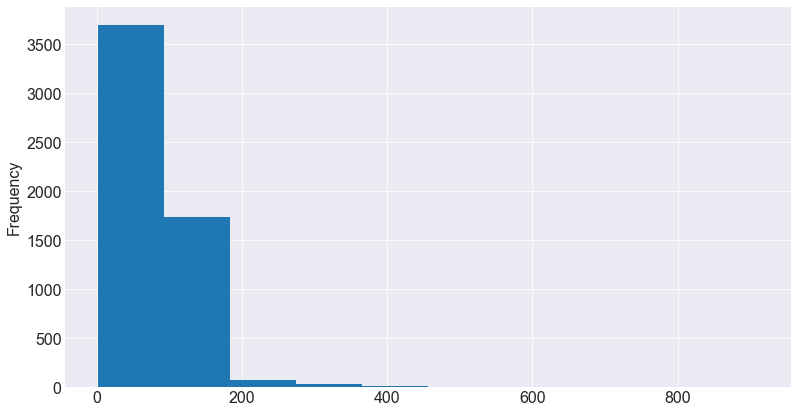

In [55]:
df.message_length.plot.hist()

In [56]:
df['word_count'] = df.text.apply(clean).apply(str.split).apply(len)

<AxesSubplot:xlabel='message_length', ylabel='word_count'>

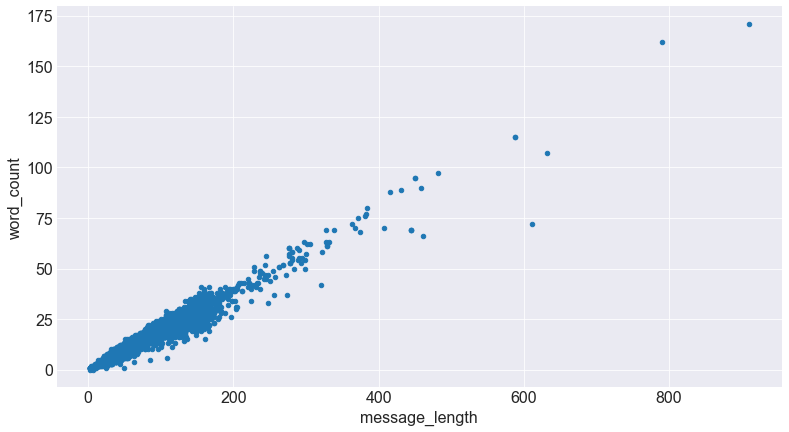

In [57]:
df.plot.scatter(y='word_count', x='message_length')

In [ ]:
sns.relplot(data=df, y='word_count',x='message_length',hue='label')

## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - valence scored wordlists
    - overall labels, measure is how well it compares to human judgement
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf) `nltk.sentiment.vader.SentimentIntensityAnalyzer`)


In [62]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('I love this weather')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [65]:
df['sentiment'] = df.text.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,label,text,message_length,word_count,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.7964
3,ham,U dun say so early hor... U c already then say...,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,-0.1027
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,0.8805
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,0.0000
5569,ham,"Pity, * was in mood for that. So...any other s...",57,9,-0.2960
5570,ham,The guy did some bitching but I acted like i'd...,125,26,0.8934


Apply this to the text message data

## More Resources

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - Suggestion: narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) (Try with, e.g. [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))
- [Textblob library](https://textblob.readthedocs.io/en/dev/)